<a href="https://colab.research.google.com/github/vitormiro/estatistica_ppger_ufc/blob/main/python_fundamentos_8_pandas_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratória de Dados

Análise exploratória de dados (AED) é uma etapa muito importante para a análise de dados estatísticos.

A finalidade da EAD é examinar os dados antes de qualquer tipo de modelagem em si; para que o analista ou pesquisador seja capaz de conhecer e entender ao máximo os dados em mãos.

Obviamente, a primeira etapa consiste em obter os dados e disponibilizá-los em um formato adequado para análise.
Posteriormente, inicia-se uma análise descritiva detalhada, para que o analista possa se familiarizar com os dados, organizá-los e sintetizá-los de forma a obter as informações necessárias ao estudo.

Na análise exploratória podemos:

- realizar um exame gráfico das variáveis individuais;
- realizar um exame gráfico de relações entre as variáveis e uma análise descritiva sobre o grau de correlação entre elas;
- avaliar a presença de dados ausentes (missing);
- identificar os possíveis outliers;
- avaliar algumas suposições básicas, como normalidade, lineariedade e homocedasticidade.


#### A base de dados
Neste Notebook vamos analisar dados da Pesquisa Nacional por Amostra de Domicílios Contínua (PNADC).
A PNADC é uma pesquisa amostral levada à campo pelo Instituto Brasileiro de Geografia e Estatística, o IBGE.

Aqui analisazeremos os dados para o 4º trimestre de 2019.
Para saber mais sobre a PNADC acesse o site do IBGE: https://www.ibge.gov.br/estatisticas/sociais/populacao/9171-pesquisa-nacional-por-amostra-de-domicilios-continua-mensal.html .


Para o exercício realizado neste Notebook empregaremos os dados da PNAD de forma bruta, sem adequar os dados ao desenho amostral da pesquisa. O objetivo é realizar um exercício sem introduzir temas relativos ao desenho amostral complexo (que exigiria a aplicação de conceitos estatísticos específicos).

Caso você tenha interesse em saber mais, o plano amostral adotado na PNAD Contínua é conglomerado em dois estágios de seleção com estratificação das unidades primárias de amostragem (UPAs). Mais detalhes podem ser vistos na notas metodológicas: ftp://ftp.ibge.gov.br/Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_continua/Notas_metodologicas/notas_metodologicas.pdf .



## Análise Exploratória de dados no Python/ Pandas





Vamos começar importando as bibliotecas necessárias para a AED.
Abaixo segue uma lista das bibliotecas utilizadas e onde você pode encontar a documentação de cada uma delas.

- [NumPy](https://numpy.org/)

- [Pandas](https://pandas.pydata.org)

- [Matplotlib](https://matplotlib.org) para a contrução de gráficos

- [Seaborn](https://seaborn.pydata.org/) para a contrução de gráficos

In [1]:
# importar bibliotecas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregar os dados

Aqui termo disponível os dados da PNADC (2019.4) em formato `.csv`. Originalmente, o IBGE fornece os dados no formato `.txt`.
Para facilitar o processo de leitura neste Notebook, fiz a conversão prévia dos dados.

Para carregar os dados usaremos o método `read_csv`.

No código abaixo inseri 3 possibilidades a depender de onde os dados serão carregados.


In [8]:
# Importando diretamente de um diretório local (supondo que o notebook está no mesmo diretório)
#dfpnadc = pd.read_csv('pnad19t4.csv')

# Usando um arquivo compactado. Nesse caso, devemos usar o parâmetro 'compression'
#dfpnadc = pd.read_csv('pnad19t4.zip', compression='zip')

# Importando o arquivo de dados com uma url (aqui, de um diretório no GitHub)
dfpnadc = pd.read_csv('https://raw.githubusercontent.com/vitormiro/python_pnadc/main/pnad19t4.csv')

O Pandas carrega os dados na forma de um **DataFrame**.



In [11]:
# Ver tipo de objeto
type(dfpnadc)

pandas.core.frame.DataFrame

Para termos uma ideia da dimensão do DataFrame vamos aplicar o método `shape`.

In [9]:
# Aplicando o método 'shape' para verificar a dimensão dos dados
dfpnadc.shape

(542802, 21)

Perceba que temos 542.802 linhas e 21 colunas.

Com o método `info` obtemos informações como o nome das variáveis (colunas), a quantidade e o tipo de dados válidos (não faltantes).

In [10]:
# Informações do DataFrame
dfpnadc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542802 entries, 0 to 542801
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ano        542802 non-null  int64  
 1   Trimestre  542802 non-null  int64  
 2   UF         542802 non-null  int64  
 3   Capital    124388 non-null  float64
 4   UPA        542802 non-null  int64  
 5   Estrato    542802 non-null  int64  
 6   V1008      542802 non-null  int64  
 7   V1014      542802 non-null  int64  
 8   V1027      542802 non-null  float64
 9   V1029      542802 non-null  int64  
 10  posest     542802 non-null  int64  
 11  V2007      542802 non-null  int64  
 12  V2009      542802 non-null  int64  
 13  V2010      542802 non-null  int64  
 14  VD3004     508846 non-null  float64
 15  VD3005     508846 non-null  float64
 16  VD4001     439850 non-null  float64
 17  VD4002     258319 non-null  float64
 18  VD4009     231285 non-null  float64
 19  VD4010     231285 non-n

#### Dicionário da PNAD contínua

Para termos uma ideia das variáveis contidas nesta base de dados, podemos consultar o dicionário de dados da PNADC.
O dicionário pode ser encontrado na página da pesquisa.

Abaixo segue a descrição das variáveis selecionadas para compor a nossa análise.


- UF = unidade da federação

- Capital = Município da Capital

- V2007 = Sexo

- V2009 = Idade do morador na data de referência

- V2010 = Cor ou raça

- VD3004 = Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental -  SISTEMA DE 9 ANOS

- VD3005 = Anos de estudo (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental - SISTEMA DE 9 ANOS

- VD4001 = Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade

- VD4002 = Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade

- VD4009 = Posição na ocupação e categoria do emprego do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade

- VD4010 = Grupamentos de atividade principal do empreendimento do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade
 
- VD4020 = Rendimento mensal efetivo de todos os trabalhos para pessoas de 14 anos ou mais de idade (apenas para pessoas que receberam em dinheiro, produtos ou mercadorias em qualquer trabalho).


O método `head` permite vizualizar as primeiras linhas do DataFrame. Por *default* o Pandas apresenta as 5 primeira linhas. Aqui utilizaremos o argumento para mostrar as 20 primeiras linhas.

In [12]:
# Método 'head' para mostar as (20) primeiras linhas do DataFrame
dfpnadc.head(20)

,Ano,Trimestre,UF,Capital,UPA,Estrato,V1008,V1014,V1027,V1029,...,V2007,V2009,V2010,VD3004,VD3005,VD4001,VD4002,VD4009,VD4010,VD4020
0,2019,4,11,11.0,110000016,1110011,1,7,98.756636,532471,...,2,45,4,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,2019,4,11,11.0,110000016,1110011,1,7,98.756636,532471,...,2,27,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,2019,4,11,11.0,110000016,1110011,1,7,98.756636,532471,...,2,18,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,2019,4,11,11.0,110000016,1110011,1,7,98.756636,532471,...,1,6,4,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,1,55,4,2.0,1.0,2.0,NaN,NaN,NaN,NaN
5,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,2,54,4,5.0,12.0,1.0,1.0,7.0,9.0,1000.0
6,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,2,30,4,6.0,14.0,2.0,NaN,NaN,NaN,NaN
7,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,1,16,4,2.0,8.0,2.0,NaN,NaN,NaN,NaN
8,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,1,11,4,2.0,4.0,NaN,NaN,NaN,NaN,NaN
9,2019,4,11,11.0,110000016,1110011,4,7,98.756636,532471,...,1,24,1,5.0,12.0,1.0,1.0,9.0,6.0,2500.0


#### Removendo colunas

Alguma colunas deste DataFrame não serão importante para o exercício que iremos realizar.
Dessa forma, vamos excluí-las da base, deixando o DataFrame mais leve.
Para isso, usamos o médodo `drop` e passamos a lista de variáveis a serem deletadas.

In [13]:
# Usando o método 'drop' para excluir colunas (variáveis)
dfpnadc = dfpnadc.drop(columns=['Ano', 'Trimestre', 'UPA', 'Estrato', 'V1008', 'V1014', 'V1027', 'V1029', 'posest'])

# Visualizar as (10) primeiras linhas do DataFrame
dfpnadc.head(10)

,UF,Capital,V2007,V2009,V2010,VD3004,VD3005,VD4001,VD4002,VD4009,VD4010,VD4020
0,11,11.0,2,45,4,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,11,11.0,2,27,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,11,11.0,2,18,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,11,11.0,1,6,4,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,11,11.0,1,55,4,2.0,1.0,2.0,NaN,NaN,NaN,NaN
5,11,11.0,2,54,4,5.0,12.0,1.0,1.0,7.0,9.0,1000.0
6,11,11.0,2,30,4,6.0,14.0,2.0,NaN,NaN,NaN,NaN
7,11,11.0,1,16,4,2.0,8.0,2.0,NaN,NaN,NaN,NaN
8,11,11.0,1,11,4,2.0,4.0,NaN,NaN,NaN,NaN,NaN
9,11,11.0,1,24,1,5.0,12.0,1.0,1.0,9.0,6.0,2500.0


#### Renomear variáveis
Para não lidar com os códigos das variáveis durante toda a análise (e não precisar decorá-los) podemos renomear as colunas.
Para isso usamos o `rename`.

In [14]:
# Aplicar o método 'rename' passando um dicionário ['nome anterior': 'nome novo']
# ao parâmetro columns (com o objetivo de renomear colunas)
# 0 parâmetro 'inplace=True' salva as mudanças no DataFrame
dfpnadc.rename(columns={'V2007':'sexo',
                   'V2009':'idade',
                   'V2010':'cor',
                   'VD3004':'escolaridade',
                   'VD3005':'anos_estudo',
                   'VD4001':'forca_trabalho',
                   'VD4002':'ocupado',
                   'VD4009':'tipo_ocupacao',
                   'VD4010':'atividade',
                   'VD4020':'renda_trabalho'}, inplace=True)

# Visualizar as primeiras linhas do DataFrame
dfpnadc.head()

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho
0,11,11.0,2,45,4,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,11,11.0,2,27,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,11,11.0,2,18,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,11,11.0,1,6,4,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,11,11.0,1,55,4,2.0,1.0,2.0,NaN,NaN,NaN,NaN


Podemos "mapear" uma variável qualitativa usando o método `map` e passar um dicionário como argumento.

Aqui faremos isso para a variável `sexo`. Nesta variável código 1 = "homem" e código 2 = "mulher".

In [16]:
# Usar o map para atribuir rótulos para a variável categórica;
dfpnadc['sexo'] = dfpnadc['sexo'].map({1:'homem', 2:'mulher'})

# Visualizar
dfpnadc.head()

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho
0,11,11.0,mulher,45,4,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,11,11.0,mulher,27,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,11,11.0,mulher,18,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,11,11.0,homem,6,4,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,11,11.0,homem,55,4,2.0,1.0,2.0,NaN,NaN,NaN,NaN


Vamos aplicar o método `map` para atribuir rótulos à variável 'cor'

In [17]:
# Usar o map para atribuir rótulos para a variável categórica;
dfpnadc['cor'] = dfpnadc['cor'].map({1:'branca', 2:'preta', 3:'amarela', 4:'parda', 5:'indigena', 9:'ignorado'})

#### Verificando valores ausentes (missing values) nas variáveis

É possível verificar a presença de algumas entradas na base `NaN` (Not a Number). São valores ausentes (por diversas razões) na nossa base.

O método `isnull` retorna valores booleanos indicando dados ausentes (TRUE) ou não (FALSE).

In [18]:
# Aplicando o método 'isnull' para rotular dados faltantes.
dfpnadc.isnull()

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
542797,False,False,False,False,False,False,False,False,False,False,False,False
542798,False,False,False,False,False,False,False,False,True,True,True,True
542799,False,False,False,False,False,False,False,True,True,True,True,True
542800,False,False,False,False,False,False,False,False,False,False,False,False


Podemos conciliar os métodos `isnull` e `sum` para termos a quantidade de valores faltantes em cada variável.
Algumas destas variaveis apresentam valores faltantes pelo fato da informação não ser aplicavél.
Em outros casos, o dado faltante representa a verdadeira ausência da informação, como o caso da renda do trabalho para uma pessoa que não está ocupada.

In [19]:
# Quantidade de valores faltantes combinando 'isnull' e 'sum'
dfpnadc.isnull().sum()

UF                     0
Capital           418414
sexo                   0
idade                  0
cor                    0
escolaridade       33956
anos_estudo        33956
forca_trabalho    102952
ocupado           284483
tipo_ocupacao     311517
atividade         311517
renda_trabalho    319626
dtype: int64

Podemos também obter a proporção de valores faltantes em cada variável.

In [ ]:
# Proporção de valores faltantes
(dfpnadc.isnull().sum() / dfpnadc.shape[0])*100

UF                 0.000000
Capital           77.084093
sexo               0.000000
idade              0.000000
cor                0.000000
escolaridade       6.255688
anos_estudo        6.255688
forca_trabalho    18.966769
ocupado           52.410087
tipo_ocupacao     57.390540
atividade         57.390540
renda_trabalho    58.884455
dtype: float64

Note que a variável capital possui mais de 77% de dados faltantes. Nesse caso, a razão é simples: são domicílios que compõem a amostra localizados fora do município da capital.
Por sua vez, variáveis de mercado de trabalho possuem muitos valores faltantes porque as questões da pesquisa nesta área não se aplicam a todos os entrevistados. A participação na força de trabalho, por exemplo, só se aplica para pessoa em idade para trabalhar (com exceção dos casos de trabalho infantil).
A renda do trabalho só será respondida por quem está ocupado e possui rendimentos. E ainda há a possibilidade de uma pessoa ocupada simplesmente omitir o valor dos seus rendimentos.

Podemos ter várias razões para dados ausentes, e isso deve ser analisado no contexto de cada base de dados.

### Análise descritiva dos dados

Um dos principais objetivos da AED é apresentar os dados de forma sistematizada.
Podemos aplicar técnicas de estatística descritiva para análisar os dados.

Vamos analisar inicialmente algumas variáveis categóricas como **sexo** e **cor**.

Para esse propósito (analisar variáveis categóricas), o método `.value_counts()` é muito útil, pois realiza a contagem de valores exclusivos.

In [20]:
# Contando valores absolutos - frequência
dfpnadc['sexo'].value_counts()  #Alternativamente podemos usar o comando dfpnadc.sexo.value_counts()

mulher    278277
homem     264525
Name: sexo, dtype: int64

In [21]:
# Distribuição - frequência relativa
dfpnadc['sexo'].value_counts(normalize = True) * 100

mulher    51.26676
homem     48.73324
Name: sexo, dtype: float64

Vamos repetir estas operações atribuindo "rótulos" para os dados.

In [22]:
freq_sexo = dfpnadc['sexo'].value_counts()
dist_sexo = dfpnadc['sexo'].value_counts(normalize = True) * 100

Agora vamos contruir uma tabela (um "pequeno DataFrame") com as informações acima:

In [23]:
df_sexo = pd.DataFrame({'Frequência': freq_sexo, 'Percentual (%)': dist_sexo})
df_sexo

,Frequência,Percentual (%)
mulher,278277,51.26676
homem,264525,48.73324


Vamos visualizar essa informação em um gráfico de pizza (Ok, usaremos um gráfico de pizza aqui; mas não recomendo que abuse deste gráfico em suas análises).

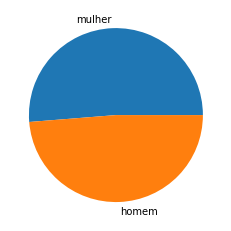

In [32]:
# Gráfico de pizza com Matplotlib
plt.pie(df_sexo['Percentual (%)'], labels=df_sexo.index);

Vamos aplicar esta mesma análise para a variável **cor**.

In [33]:
freq_cor = dfpnadc['cor'].value_counts()
dist_cor = dfpnadc['cor'].value_counts(normalize = True) * 100

df_cor = pd.DataFrame({'Frequência': freq_cor, 'Percentual (%)': dist_cor})
df_cor

,Frequência,Percentual (%)
parda,283365,52.204119
branca,206447,38.033574
preta,47596,8.768575
amarela,2689,0.495392
indigena,2620,0.482681
ignorado,85,0.015659


Vamos plotar um gráfico "pizza" para ver a distribuição da variável **cor**.

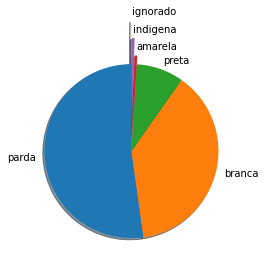

In [34]:
plt.pie(df_cor['Percentual (%)'], 
        labels = df_cor.index,
        startangle = 90, 
        shadow = True, 
        explode = (0,0,0,0.1,0.3,0.5))
plt.show()

Considerando grupos com participações muito pequenas, talvez o gráfico "pizza" não seja a melhor forma de vizualizar estes dados! (geralmente não é!).

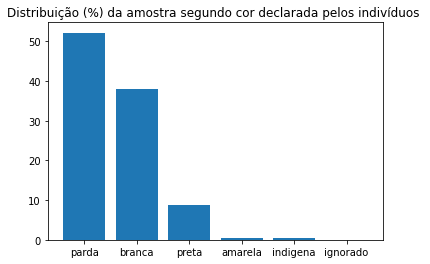

In [35]:
# Gráfico de barras com Matplotlib
plt.bar(df_cor.index, df_cor['Percentual (%)'])
plt.title("Distribuição (%) da amostra segundo cor declarada pelos indivíduos ")
plt.show()

Vamos verificar também a distribuição da amostra entre os estados (UFs).

In [37]:
# contar valores
dfpnadc.UF.value_counts()

35    42568
31    39953
33    38547
21    36744
42    32873
41    28878
23    28481
43    28244
29    26634
26    22004
27    20817
32    20270
15    19886
52    18053
13    16278
25    14418
51    13155
22    12893
50    11825
24    11169
28    10442
12    10386
53     9849
11     9274
17     7788
14     6275
16     5098
Name: UF, dtype: int64

Perceba que as UFs estão representadas por seus códigos.

Vamos criar um dicionários e depois usar novamente o método `map`.

In [38]:
# Dicionário para os códigos das UFs
uf_map = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [39]:
# Atribuindo rótulos (nomes) para os códigos das UFs
dfpnadc['UF'] = dfpnadc['UF'].map(uf_map)

dist_uf = dfpnadc.UF.value_counts()
dist_uf

São Paulo              42568
Minas Gerais           39953
Rio de Janeiro         38547
Maranhão               36744
Santa Catarina         32873
Paraná                 28878
Ceará                  28481
Rio Grande do Sul      28244
Bahia                  26634
Pernambuco             22004
Alagoas                20817
Espírito Santo         20270
Pará                   19886
Goiás                  18053
Amazonas               16278
Paraíba                14418
Mato Grosso            13155
Piauí                  12893
Mato Grosso do Sul     11825
Rio Grande do Norte    11169
Sergipe                10442
Acre                   10386
Distrito Federal        9849
Rondônia                9274
Tocantins               7788
Roraima                 6275
Amapá                   5098
Name: UF, dtype: int64

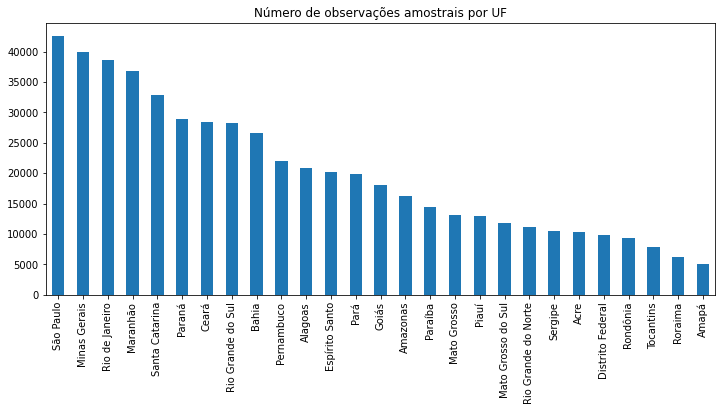

In [40]:
# Plotar em um gráfico de barras utilizando um formato um pouco diferente do comando
dist_uf.plot(kind='bar', figsize=(12,5))
plt.title("Número de observações amostrais por UF");

### Tabelas de Contingência (tabelas cruzadas)

Uma tabela de contingência apresenta as frequência (absolutas ou relativas) de múltiplas variáveis categóricas. As linhas e colunas das tabelas correspondem a essas variáveis categóricas.

Podemos usar o método `crosstab` para formatar tabelas de contingência na nossa análise.

In [41]:
# Frequências absolutas
sexo_cor = pd.crosstab(dfpnadc['sexo'], dfpnadc['cor'])
sexo_cor

cor,amarela,branca,ignorado,indigena,parda,preta
sexo,,,,,,
homem,1228,98471,43,1297,139759,23727
mulher,1461,107976,42,1323,143606,23869


In [42]:
# Frequências relativas - Distribuição conjunta
dist_sexo_cor = pd.crosstab(dfpnadc['sexo'], dfpnadc['cor'], normalize = True) * 100
dist_sexo_cor

cor,amarela,branca,ignorado,indigena,parda,preta
sexo,,,,,,
homem,0.226234,18.141238,0.007922,0.238945,25.747694,4.371207
mulher,0.269159,19.892336,0.007738,0.243735,26.456424,4.397368


### Análise de variáveis numéricas

#### Sumário estatístico

Com o método `describe` temos um sumário estatísticos para uma variável numérica.

Aqui vamos pedir um sumário estatístico para a variável **idade**.

In [43]:
# Sumário estatístico de uma variável com o método 'describe'
dfpnadc['idade'].describe()

count    542802.000000
mean         35.642067
std          21.800881
min           0.000000
25%          17.000000
50%          34.000000
75%          52.000000
max         110.000000
Name: idade, dtype: float64

Podemos realizar o cálculo de medidas de tendência central - média, mediana e moda - usando os métodos `mean()`, `median()` e `mode()`.

In [ ]:
tend_central_idade = {'Média (idade)': dfpnadc['idade'].mean(), 
                           'Mediana (idade)': dfpnadc['idade'].median(), 
                           'Moda (idade)': dfpnadc['idade'].mode()}
tend_central_idade

{'Média (idade)': 35.64206653623236,
 'Mediana (idade)': 34.0,
 'Moda (idade)': 0    19
 dtype: int64}

Vamos plotar um histograma da distribuição de idades.
Para este histograma vamos usar a biblioteca **seaborn**.

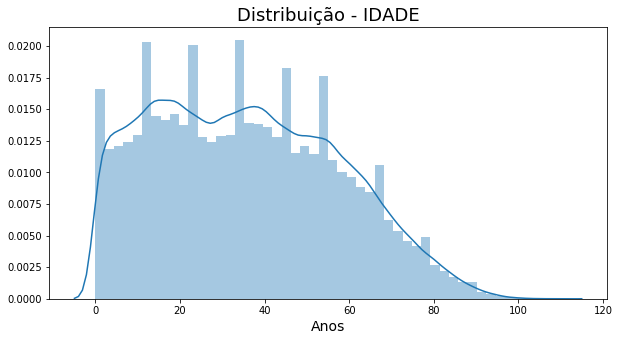

In [ ]:
hist_idade = sns.distplot(dfpnadc['idade'])
hist_idade.figure.set_size_inches(10, 5)
hist_idade.set_title('Distribuição - IDADE', fontsize = 18)
hist_idade.set_xlabel('Anos', fontsize = 14)
hist_idade;

### Filtrando dados

In [ ]:
# Filtar o DataFrame
dfpnadc25 = dfpnadc[dfpnadc["V2009"]>=25]

In [ ]:
dfpnadc25["V2009"].value_counts()

In [ ]:
dfpnadc25.head(10)

In [ ]:
dfpnadc25.shape

In [ ]:
dfpnadc25["V2009"].describe()

In [ ]:
freq_estudo = dfpnadc['VD3005'].value_counts()
freq_estudo

In [ ]:
dist_estudo = dfpnadc['VD3005'].value_counts(normalize = True) * 100
dist_estudo

In [ ]:
estudo = dfpnadc25['VD3005'].hist(bins=15, figsize=(15,10))

estudo.figure.set_size_inches(10, 5)
estudo.set_title('Distribuição de Frequências - Anos de Estudo', fontsize=18)
estudo.set_xlabel('Anos de estudo', fontsize=14)
estudo.set_ylabel('Frequência', fontsize=14)
estudo

In [ ]:
ocupados = dfpnadc25[(dfpnadc25["VD4002"] == 1) & (dfpnadc25["VD4020"] > 0)]

In [ ]:
ocupados.head(10)

In [ ]:
ocupados.shape

In [ ]:
# plotar o histograma para várias variáveis numéricas
ocupados[['VD4020', 'VD3005']].hist(figsize=(15,10))

In [ ]:
# plotar um gráfico de dispersão
ocupados.plot.scatter('VD3005', 'VD4020')